In [322]:
from imgaug import augmenters as iaa
from torchvision import transforms
import random
import numpy as np

class ImgAugTransformer:
    resize = None
    resize_add = None
    resize_hue = None
    resize_add_hue = None
    normalize_to_tensor = None

    def __init__(self, height=224, width=224, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
        self.resize_add = \
            iaa.Sequential([
                iaa.Resize({"height": height, "width": width}),
                iaa.Fliplr(0.5),
                iaa.Add((-30, 30)),
            ])

        self.resize_hue = \
            iaa.Sequential([
                iaa.Resize({"height": height, "width": width}),
                iaa.Fliplr(0.5),
                iaa.AddToHue((-20, 20))
            ])

        self.resize_add_hue = \
            iaa.Sequential([
                iaa.Resize({"height": height, "width": width}),
                iaa.Fliplr(0.5),
                iaa.Add((-30, 30)),
                iaa.AddToHue((-20, 20))
            ])

        self.normalize_to_tensor = \
            transforms.Compose([
                transforms.ToTensor(),
                # transforms.Normalize(mean=mean, std=std)
            ])

        self.auto_augmentation = \
            transforms.Compose([
                transforms.Resize((height, width)),
                transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
                transforms.ToTensor(),
                # transforms.Normalize(mean=mean, std=std)
            ])

        self.resize = \
            iaa.Sequential([
                iaa.Resize({"height": height, "width": width}),
            ])

    def random_call(self, image):
        image = np.array(image)
        target_aug = random.choice([self.resize_add, self.resize_hue, self.resize_add_hue])
        x = target_aug(image=image)
        return self.normalize_to_tensor(x)

    def auto_call(self, image):
        return self.auto_augmentation(image)

    def resize_call(self, image):
        image = np.array(image)
        x = self.resize(image=image)
        return self.normalize_to_tensor(x)

    def resize_add_call(self, image):
        image = np.array(image)
        x = self.resize_add(image=image)
        return self.normalize_to_tensor(x)

    def resize_hue_call(self, image):
        image = np.array(image)
        x = self.resize_hue(image=image)
        return self.normalize_to_tensor(x)

    def resize_add_hue_call(self, image):
        image = np.array(image)
        x = self.resize_add_hue(image=image)
        return self.normalize_to_tensor(x)

    def __call__(self, image, apply_aug=False):
        if apply_aug == True:
            return self.auto_call(image)
        else:
            return self.resize_call(image)


In [323]:
from PIL import Image

import matplotlib.pyplot as plt

image = Image.open("/media/mlfavorfit/sda/product_img/Sexy/0_Portr")

In [331]:
transformer = ImgAugTransformer()
image_raw = transformer.resize_call(image).permute(1,2,0)
image_aug = transformer.random_call(image).permute(1,2,0)

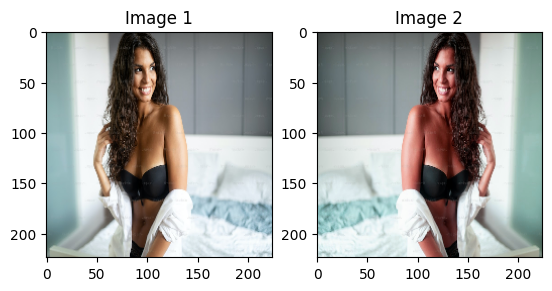

In [332]:
plt.figure()

plt.subplot(1, 2, 1) 
plt.imshow(image_raw)
plt.title("Image 1")

plt.subplot(1, 2, 2)
plt.imshow(image_aug)
plt.title("Image 2")

plt.show()